In [28]:
import pandas as pd

In [41]:
if not os.path.isfile('data1.csv'):
    # Create a file 'data.csv' before reading it
    # Read all the files in netflix and store them in one big file('data.csv')
    # We re reading from each of the four files and appendig each rating to a global file 'train.csv'
    data = open('data1.csv', mode='w')
    
    row = list()
    files=['combined_data_1.txt','combined_data_2.txt', 
           'combined_data_3.txt', 'combined_data_4.txt']
    for file in files:
        print("Reading ratings from {}...".format(file))
        with open(file) as f:
            for line in f: 
                del row[:] # you don't have to do this.
                line = line.strip()
                if line.endswith(':'):
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
        print("Done.\n")
    data.close()

Reading ratings from combined_data_1.txt...
Done.

Reading ratings from combined_data_2.txt...
Done.

Reading ratings from combined_data_3.txt...
Done.

Reading ratings from combined_data_4.txt...
Done.



In [42]:
print("creating the dataframe from data.csv file..")
df = pd.read_csv('data1.csv', sep=',', 
                       names=['Movie_id', 'Customer_id','Rating','Date'])
df.date = pd.to_datetime(df.Date)
print('Done.\n')

# we are arranging the ratings according to time.
print('Sorting the dataframe by customer id and date..')
df.sort_values(by=['Customer_id','Date'], inplace=True)
print('Done..')

creating the dataframe from data.csv file..


/var/folders/jw/ll1dqsq57z18kdvpw8n2cc9m0000gn/T/ipykernel_9923/625273265.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.date = pd.to_datetime(df.Date)


Done.

Sorting the dataframe by customer id and date..
Done..


In [43]:
df.head()

,Movie_id,Customer_id,Rating,Date
3657676,705,6,3,2004-03-09
6495175,1267,6,3,2004-03-09
7800568,1561,6,3,2004-03-09
10653731,2095,6,4,2004-03-09
12910599,2456,6,4,2004-03-09


In [44]:
df = df.dropna()

In [45]:
df.shape

(100480507, 4)

In [50]:
df.describe()['Rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [51]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


In [52]:
dup_bool = df.duplicated(['Movie_id','Customer_id','Rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


 <h3>3.1.4 Basic Statistics (#Ratings, #Users, and #Movies)</h3>

In [53]:
import numpy as np
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Customer   :", len(np.unique(df.Customer_id)))
print("Total No of movies  :", len(np.unique(df.Movie_id)))

Total data 
--------------------------------------------------

Total no of ratings : 100480507
Total No of Customer   : 480189
Total No of movies  : 17770


In [54]:
no_of_rated_movies_per_user = df.groupby(by='Customer_id')['Rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

Customer_id
305344     17653
387418     17436
2439493    16565
1664010    15813
2118461    14831
Name: Rating, dtype: int64

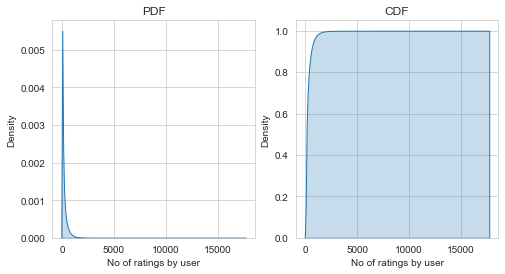

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [56]:
no_of_rated_movies_per_user.describe()

count    480189.000000
mean        209.251997
std         302.339155
min           1.000000
25%          39.000000
50%          96.000000
75%         259.000000
max       17653.000000
Name: Rating, dtype: float64

> _There,  is something interesting going on with the quantiles.._

In [57]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

TypeError: annotate() missing 1 required positional argument: 'text'

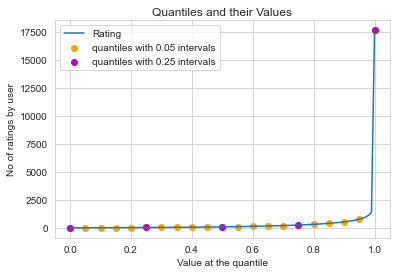

In [59]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

In [60]:
quantiles[::5]

0.00        1
0.05       12
0.10       19
0.15       25
0.20       31
0.25       39
0.30       46
0.35       55
0.40       66
0.45       80
0.50       96
0.55      117
0.60      142
0.65      173
0.70      211
0.75      259
0.80      322
0.85      410
0.90      541
0.95      779
1.00    17653
Name: Rating, dtype: int64

In [61]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 190)) )


 No of ratings at last 5 percentile : 157055



<h3>  Analysis of ratings of a movie given by a user </h3>

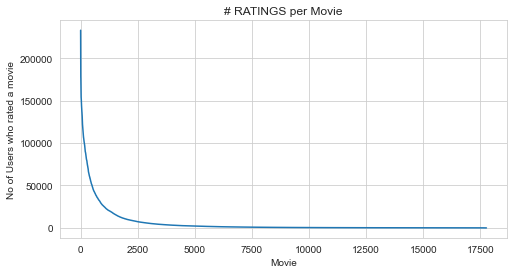

In [62]:
no_of_ratings_per_movie = df.groupby(by='Movie_id')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')


plt.show()

In [63]:
df.Movie_id.unique().shape

(17770,)

In [5]:
#df = pd.read_csv('customer_wise_data.csv')

In [71]:
df['Movie_id'] = df['Movie_id'].astype(int)

In [72]:
df2 = df.groupby('Customer_id')['Movie_id'].apply(list).reset_index(name='movie_ids')

In [73]:
df2

,Customer_id,movie_ids
0,6,"[705, 1267, 1561, 2095, 2456, 3423, 4506, 5069..."
1,7,"[11234, 458, 1145, 5317, 6287, 6528, 6972, 739..."
2,8,"[1144, 1202, 1428, 1518, 1719, 1799, 1843, 190..."
3,10,"[571, 2122, 6029, 6972, 9340, 11064, 14367, 15..."
4,25,"[178, 17308, 761, 11819, 3427, 4432, 4656, 499..."
...,...,...
480184,2649404,"[299, 6287, 6692, 9340, 14313, 14538, 15205, 6..."
480185,2649409,"[9471, 12161, 14454, 457, 14240, 191, 14999, 1..."
480186,2649421,"[1877, 2152, 3078, 4640, 5317, 6287, 7617, 843..."
480187,2649426,"[5227, 3905, 7971, 15772, 12329, 15158, 216, 9..."


In [68]:
df2['#ofmovies'] = df2['movie_ids'].apply(lambda x: len(x))

In [69]:
ratings = df.groupby('Customer_id')['Rating'].apply(list).reset_index()

In [74]:
ratings = pd.DataFrame(ratings)

In [75]:
ratings['Rating']

0         [3, 3, 3, 4, 4, 4, 3, 3, 5, 3, 4, 4, 3, 3, 5, ...
1         [5, 5, 3, 2, 5, 4, 2, 4, 5, 4, 5, 4, 3, 2, 4, ...
2         [4, 5, 4, 4, 1, 5, 3, 5, 3, 5, 4, 4, 4, 4, 4, ...
3         [4, 4, 3, 4, 5, 3, 5, 4, 3, 3, 3, 5, 3, 4, 4, ...
4         [3, 3, 4, 4, 2, 5, 3, 2, 4, 4, 5, 2, 3, 1, 2, ...
                                ...                        
480184    [3, 4, 4, 5, 5, 4, 3, 4, 4, 1, 4, 3, 4, 4, 5, ...
480185    [3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 2, ...
480186    [5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 4, ...
480187    [4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, ...
480188    [5, 4, 2, 4, 4, 4, 5, 3, 5, 5, 5, 5, 5, 4, 5, ...
Name: Rating, Length: 480189, dtype: object

In [76]:
df2['ratings'] = ratings['Rating']

In [77]:
df2

,Customer_id,movie_ids,ratings
0,6,"[705, 1267, 1561, 2095, 2456, 3423, 4506, 5069...","[3, 3, 3, 4, 4, 4, 3, 3, 5, 3, 4, 4, 3, 3, 5, ..."
1,7,"[11234, 458, 1145, 5317, 6287, 6528, 6972, 739...","[5, 5, 3, 2, 5, 4, 2, 4, 5, 4, 5, 4, 3, 2, 4, ..."
2,8,"[1144, 1202, 1428, 1518, 1719, 1799, 1843, 190...","[4, 5, 4, 4, 1, 5, 3, 5, 3, 5, 4, 4, 4, 4, 4, ..."
3,10,"[571, 2122, 6029, 6972, 9340, 11064, 14367, 15...","[4, 4, 3, 4, 5, 3, 5, 4, 3, 3, 3, 5, 3, 4, 4, ..."
4,25,"[178, 17308, 761, 11819, 3427, 4432, 4656, 499...","[3, 3, 4, 4, 2, 5, 3, 2, 4, 4, 5, 2, 3, 1, 2, ..."
...,...,...,...
480184,2649404,"[299, 6287, 6692, 9340, 14313, 14538, 15205, 6...","[3, 4, 4, 5, 5, 4, 3, 4, 4, 1, 4, 3, 4, 4, 5, ..."
480185,2649409,"[9471, 12161, 14454, 457, 14240, 191, 14999, 1...","[3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 2, ..."
480186,2649421,"[1877, 2152, 3078, 4640, 5317, 6287, 7617, 843...","[5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 4, ..."
480187,2649426,"[5227, 3905, 7971, 15772, 12329, 15158, 216, 9...","[4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, ..."


In [78]:
df2['#ofratings'] = df2['ratings'].apply(lambda x: len(x))

In [112]:
df2

,Customer_id,movie_ids,ratings,#ofratings
0,6,"[705, 1267, 1561, 2095, 2456, 3423, 4506, 5069...","[3, 3, 3, 4, 4, 4, 3, 3, 5, 3, 4, 4, 3, 3, 5, ...",626
1,7,"[11234, 458, 1145, 5317, 6287, 6528, 6972, 739...","[5, 5, 3, 2, 5, 4, 2, 4, 5, 4, 5, 4, 3, 2, 4, ...",881
2,8,"[1144, 1202, 1428, 1518, 1719, 1799, 1843, 190...","[4, 5, 4, 4, 1, 5, 3, 5, 3, 5, 4, 4, 4, 4, 4, ...",98
3,10,"[571, 2122, 6029, 6972, 9340, 11064, 14367, 15...","[4, 4, 3, 4, 5, 3, 5, 4, 3, 3, 3, 5, 3, 4, 4, ...",260
6,42,"[4389, 1645, 13359, 3962, 8614, 1303, 1470, 39...","[5, 4, 4, 5, 5, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, ...",128
...,...,...,...,...
480179,2649378,"[15107, 6720, 11198, 7971, 3315, 6029, 11677, ...","[3, 4, 5, 1, 3, 3, 2, 2, 2, 5, 3, 2, 3, 2, 1, ...",343
480182,2649388,"[270, 313, 571, 963, 1145, 1180, 1466, 1470, 1...","[4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, ...",287
480183,2649401,"[12582, 5496, 1145, 1307, 2152, 4951, 4996, 53...","[3, 4, 5, 4, 4, 5, 4, 4, 5, 3, 3, 2, 5, 4, 3, ...",130
480187,2649426,"[5227, 3905, 7971, 15772, 12329, 15158, 216, 9...","[4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, ...",295


In [113]:
dates = df.groupby('Customer_id')['Date'].apply(list).reset_index()

In [114]:
dates = pd.DataFrame(dates)
dates.head()


,Customer_id,Date
0,6,"[2004-03-09, 2004-03-09, 2004-03-09, 2004-03-0..."
1,7,"[2002-08-14, 2003-11-21, 2003-11-21, 2003-11-2..."
2,8,"[2005-08-25, 2005-08-25, 2005-08-25, 2005-08-2..."
3,10,"[2002-12-20, 2002-12-20, 2002-12-20, 2002-12-2..."
4,25,"[2004-01-21, 2004-02-02, 2005-05-20, 2005-05-2..."


In [115]:
df2['ratings'] = ratings['Rating']


In [116]:
df2['dates'] = dates['Date']

In [117]:
df2 = df2[df2['#ofratings'] <= 1000]
df2 = df2[df2['#ofratings'] > 80]


In [120]:
df2['movie_ids'] = df2['movie_ids'].apply(lambda x: x[-80:])
df2['ratings'] = df2['ratings'].apply(lambda x: x[-80:])
df2['dates'] = df2['dates'].apply(lambda x: x[-80:])

In [121]:
df2.head()

,Customer_id,movie_ids,ratings,#ofratings,dates
0,6,"[1709, 1765, 1901, 1918, 1939, 2269, 2340, 272...","[4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, ...",626,"[2005-12-04, 2005-12-04, 2005-12-04, 2005-12-0..."
1,7,"[16640, 16668, 16740, 16792, 16793, 16825, 168...","[5, 4, 5, 4, 3, 4, 4, 2, 5, 3, 3, 4, 5, 4, 4, ...",881,"[2005-05-23, 2005-05-23, 2005-05-23, 2005-05-2..."
2,8,"[3936, 3938, 4306, 4577, 4590, 4883, 4996, 505...","[4, 4, 5, 3, 4, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, ...",98,"[2005-08-25, 2005-08-25, 2005-08-25, 2005-08-2..."
3,10,"[13955, 197, 886, 2172, 2782, 3124, 3610, 3713...","[5, 4, 3, 5, 4, 5, 4, 2, 2, 5, 2, 2, 5, 5, 2, ...",260,"[2005-07-18, 2005-08-08, 2005-08-08, 2005-08-0..."
6,42,"[2874, 3938, 4420, 5496, 5807, 6868, 7607, 109...","[4, 5, 4, 4, 4, 3, 3, 3, 4, 5, 4, 3, 2, 4, 4, ...",128,"[2004-12-21, 2004-12-21, 2004-12-21, 2004-12-2..."


In [122]:
df2['#ofdays'] = df2['dates'].apply(lambda x: [(pd.to_datetime(date) - pd.to_datetime(x[0])).days + 1 for date in x])

In [123]:
df2.head()

,Customer_id,movie_ids,ratings,#ofratings,dates,#ofdays
0,6,"[1709, 1765, 1901, 1918, 1939, 2269, 2340, 272...","[4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, ...",626,"[2005-12-04, 2005-12-04, 2005-12-04, 2005-12-0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,7,"[16640, 16668, 16740, 16792, 16793, 16825, 168...","[5, 4, 5, 4, 3, 4, 4, 2, 5, 3, 3, 4, 5, 4, 4, ...",881,"[2005-05-23, 2005-05-23, 2005-05-23, 2005-05-2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,8,"[3936, 3938, 4306, 4577, 4590, 4883, 4996, 505...","[4, 4, 5, 3, 4, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, ...",98,"[2005-08-25, 2005-08-25, 2005-08-25, 2005-08-2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,10,"[13955, 197, 886, 2172, 2782, 3124, 3610, 3713...","[5, 4, 3, 5, 4, 5, 4, 2, 2, 5, 2, 2, 5, 5, 2, ...",260,"[2005-07-18, 2005-08-08, 2005-08-08, 2005-08-0...","[1, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22..."
6,42,"[2874, 3938, 4420, 5496, 5807, 6868, 7607, 109...","[4, 5, 4, 4, 4, 3, 3, 3, 4, 5, 4, 3, 2, 4, 4, ...",128,"[2004-12-21, 2004-12-21, 2004-12-21, 2004-12-2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [126]:
df2.drop(axis=1, labels='dates', inplace = True)

In [127]:
df2.head()

,Customer_id,movie_ids,ratings,#ofratings,#ofdays
0,6,"[1709, 1765, 1901, 1918, 1939, 2269, 2340, 272...","[4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, ...",626,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,7,"[16640, 16668, 16740, 16792, 16793, 16825, 168...","[5, 4, 5, 4, 3, 4, 4, 2, 5, 3, 3, 4, 5, 4, 4, ...",881,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,8,"[3936, 3938, 4306, 4577, 4590, 4883, 4996, 505...","[4, 4, 5, 3, 4, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, ...",98,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,10,"[13955, 197, 886, 2172, 2782, 3124, 3610, 3713...","[5, 4, 3, 5, 4, 5, 4, 2, 2, 5, 2, 2, 5, 5, 2, ...",260,"[1, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22..."
6,42,"[2874, 3938, 4420, 5496, 5807, 6868, 7607, 109...","[4, 5, 4, 4, 4, 3, 3, 3, 4, 5, 4, 3, 2, 4, 4, ...",128,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [128]:
df2.to_csv('customer_wise_aggregated_data.csv')